In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id="section_toc"></a> 


## Tabla de Contenidos

[1-Importación de datos y Analisis preliminar](#section1)

[2-Tratamiento Nulos](#section2)


[3-Conversion de formatos](#section3)

[4-Valores unicos](#section4)

[5-Rankings](#section5)

[6-Identificaciond de Delitos en Alza y Baja](#section6)

[7-Ranking Alcaldias](#section7)

[8-Tendencia Estacional](#section8)

[9-Indicador Nivel de Inseguridad](#section9)

[10-Anexo : Pruebas de calidad de los datos](#section10)







<a id="section1"></a> 
### 1-Importación de datos y Analisis preliminar

[volver a TOC](#section_toc)

In [240]:
#importo el dataset
data_raw=pd.read_csv("carpetas_completa_julio_2021.csv", low_memory=False)

In [241]:
#verifico tamaño del dataset
data_raw.shape

(1268638, 19)

In [242]:
#analizo la estructura de los datos
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268638 entries, 0 to 1268637
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1268202 non-null  float64
 1   mes_hechos            1268202 non-null  object 
 2   fecha_hechos          1268202 non-null  object 
 3   ao_inicio             1268638 non-null  int64  
 4   mes_inicio            1268638 non-null  object 
 5   fecha_inicio          1268635 non-null  object 
 6   delito                1268638 non-null  object 
 7   fiscalia              1268636 non-null  object 
 8   agencia               1268638 non-null  object 
 9   unidad_investigacion  1268411 non-null  object 
 10  categoria_delito      1268638 non-null  object 
 11  calle_hechos          1265456 non-null  object 
 12  calle_hechos2         494191 non-null   object 
 13  colonia_hechos        1216314 non-null  object 
 14  alcaldia_hechos       1265050 non-

In [243]:
#analisis descriptivo de los datos numericos
data_raw.describe().round(2)

,ao_hechos,ao_inicio,longitud,latitud,tempo
count,1268202.00,1268638.00,1217271.00,1217271.00,0.0
mean,2018.19,2018.34,-99.14,19.39,NaN
std,1.88,1.57,0.06,0.07,NaN
min,1906.00,2016.00,-100.23,19.10,NaN
25%,2017.00,2017.00,-99.18,19.34,NaN
50%,2018.00,2018.00,-99.14,19.39,NaN
75%,2020.00,2020.00,-99.10,19.44,NaN
max,2021.00,2021.00,-98.95,19.58,NaN


<div class="alert-warning"> 
es necesario convertir el tipo de datos para el analisis decriptivo
</div>  


In [244]:
#observacion ocular primeros registros
data_raw.head(5)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [245]:
#observacion ocular ultimos registros
data_raw.tail(5)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1268633,2021.0,Julio,2021-07-30 18:22:00,2021,Julio,2021-07-31 22:57:23,ROBO A NEGOCIO CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-9,UI-1SD,ROBO A NEGOCIO CON VIOLENCIA,PALMILLA,PINO,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,FUERO COMUN,-99.056355,19.320918,NaN
1268634,2021.0,Julio,2021-07-30 15:40:00,2021,Julio,2021-07-31 22:57:52,LESIONES CULPOSAS,FISCALÍA DE INVESTIGACIÓN DE DELITOS COMETIDOS...,59,UI-1CD,DELITO DE BAJO IMPACTO,NOTIFICACION DEL HOSPITAL NACIONAL HOMEOPÁTICO,NaN,NaN,CUAUHTEMOC,FUERO COMUN,NaN,NaN,NaN
1268635,2021.0,Julio,2021-07-31 14:00:00,2021,Julio,2021-07-31 23:01:38,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES I...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-2,UI-1CD,DELITO DE BAJO IMPACTO,AVENIDA INGENIERO EDUARDO MOLINA,AVENIDA 314,NUEVA ATZACOALCO,GUSTAVO A MADERO,FUERO COMUN,-99.087726,19.501652,NaN
1268636,2021.0,Mayo,2021-05-26 12:00:00,2021,Julio,2021-07-31 23:04:23,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ES...",FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...,AO-4,UI-1SD,DELITO DE BAJO IMPACTO,CURUCU NUM 17,NaN,AMPLIACIÓN TEPEACA,ALVARO OBREGON,FUERO COMUN,-99.233410,19.361710,NaN
1268637,2021.0,Julio,2021-07-31 17:00:00,2021,Julio,2021-07-31 23:05:44,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-4,UI-1CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,VOLCAN POPOCATEPETL,NaN,LA PRADERA,GUSTAVO A MADERO,FUERO COMUN,-99.065366,19.475436,NaN


In [246]:
#observacion ocular muestra de registros
data_raw.sample(5)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1208385,2021.0,Abril,2021-04-30 10:00:00,2021,Mayo,2021-05-01 17:15:00,ROBO DE ACCESORIOS DE AUTO,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,RAMON FABIE,GUMERSINDO ESQUER,AMPLIACIÓN ASTURIAS,CUAUHTEMOC,FUERO COMUN,-99.132632,19.405758,NaN
987161,2019.0,Septiembre,2019-09-02 12:00:00,2020,Marzo,2020-03-21 18:20:01,ABUSO DE CONFIANZA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-6,UI-2CD,DELITO DE BAJO IMPACTO,CONSTANCIA,NaN,INDUSTRIAL,GUSTAVO A MADERO,NaN,-99.124541,19.477785,NaN
792132,2017.0,Abril,2017-04-17 09:15:00,2017,Abril,2017-04-17 11:48:10,ROBO DE OBJETOS,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,DELITO DE BAJO IMPACTO,PERIFERICO SUR,NaN,PARQUE DEL PEDREGAL,TLALPAN,NaN,-99.191501,19.301932,NaN
643104,2018.0,Diciembre,2018-12-03 19:15:00,2018,Diciembre,2018-12-04 14:14:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMH,UI-1CD,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,ESTACION DEL METRO VIADUCTO,"LINEA 2, DIRECCION A CUATRO CAMINOS",VIADUCTO PIEDAD,IZTACALCO,NaN,-99.136737,19.400976,NaN
1106672,2020.0,Noviembre,2020-11-10 16:00:00,2020,Noviembre,2020-11-10 17:07:30,ENCUBRIMIENTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAJI...,CJ-2,UI-1CD,DELITO DE BAJO IMPACTO,CARRETERA MEXICO TOLUCA,NaN,LOMAS DE VISTA HERMOSA,CUAJIMALPA DE MORELOS,FUERO COMUN,-99.269830,19.373409,NaN


In [247]:
#analizo la cantidad de nulos
nulls=data_raw.apply(lambda x: x.notnull().sum())
total=data_raw.shape[0]
percent_null =nulls.apply(lambda x:x/total).reset_index()
percent_null=percent_null.rename(columns={0:'pct_complete','index':'column'})
format_dict = {'sum':'${0:,.0f}', 'date': '{:%m-%Y}', 'pct_complete': '{:.2%}'}
(percent_null
     .style
     .format(format_dict)
     .hide_index()
     .bar(color='RoyalBlue', vmin=0, vmax=1,subset=['pct_complete'], align='zero')
     .set_caption('Percentage of Nulls - Data Raw'))


column,pct_complete
ao_hechos,99.97%
mes_hechos,99.97%
fecha_hechos,99.97%
ao_inicio,100.00%
mes_inicio,100.00%
fecha_inicio,100.00%
delito,100.00%
fiscalia,100.00%
agencia,100.00%
unidad_investigacion,99.98%


<div class="alert-success"> 
Conclusion sobre la integridad de los datos:
     de los 19 campos que trae la tabla 7 campos tienen el 100% de los datos, 
    otros 9 campos tienen un bajo porcentaje de nulos. 
    Solo hay dos campos con un alto porcentaje "calle_hechos2" y "competencia"
    Y un campo totalmente nulo "tempo"

</div> 


<a id="section2"></a> 
### 2-Tratamiento Nulos

[volver a TOC](#section_toc)

In [248]:
#copio el dataset original en data
data=data_raw

<div class="alert-success"> 
Para las columnas que tienen poca cantidad de nulos la estrategia es eliminar los registros

</div> 

In [249]:
percent_null

,column,pct_complete
0,ao_hechos,0.999656
1,mes_hechos,0.999656
2,fecha_hechos,0.999656
3,ao_inicio,1.000000
4,mes_inicio,1.000000
5,fecha_inicio,0.999998
6,delito,1.000000
7,fiscalia,0.999998
8,agencia,1.000000
9,unidad_investigacion,0.999821


In [250]:
#filtro los que estan completos en mas de un 90%
percent_null[percent_null.pct_complete>0.9]

,column,pct_complete
0,ao_hechos,0.999656
1,mes_hechos,0.999656
2,fecha_hechos,0.999656
3,ao_inicio,1.000000
4,mes_inicio,1.000000
5,fecha_inicio,0.999998
6,delito,1.000000
7,fiscalia,0.999998
8,agencia,1.000000
9,unidad_investigacion,0.999821


In [251]:
#filtro los campos con pocos nulos
nulos_low=percent_null[(percent_null.pct_complete>0.9) & (percent_null.pct_complete<1)]
nulos_low

,column,pct_complete
0,ao_hechos,0.999656
1,mes_hechos,0.999656
2,fecha_hechos,0.999656
5,fecha_inicio,0.999998
7,fiscalia,0.999998
9,unidad_investigacion,0.999821
11,calle_hechos,0.997492
13,colonia_hechos,0.958756
14,alcaldia_hechos,0.997172
16,longitud,0.959510


In [252]:
#hago una lista con los campos de pocos nulos
nulos_low_list=nulos_low["column"].to_list()
nulos_low_list

['ao_hechos',
 'mes_hechos',
 'fecha_hechos',
 'fecha_inicio',
 'fiscalia',
 'unidad_investigacion',
 'calle_hechos',
 'colonia_hechos',
 'alcaldia_hechos',
 'longitud',
 'latitud']

In [253]:
#elimino los campos con pocos nulos
data.dropna(subset=nulos_low_list,  inplace=True)

In [254]:
#verifico el tamaño del dataset
data.shape

(1213742, 19)

In [255]:
#verifico la cantidad de nulos
nulls=data.apply(lambda x: x.notnull().sum())
total=data.shape[0]
percent_null =nulls.apply(lambda x:x/total).reset_index()
percent_null=percent_null.rename(columns={0:'pct_complete','index':'column'})
format_dict = {'sum':'${0:,.0f}', 'date': '{:%m-%Y}', 'pct_complete': '{:.2%}'}
(percent_null
     .style
     .format(format_dict)
     .hide_index()
     .bar(color='RoyalBlue', vmin=0, vmax=1,subset=['pct_complete'], align='zero')
     .set_caption('Percentage of Nulls - Data Raw'))

column,pct_complete
ao_hechos,100.00%
mes_hechos,100.00%
fecha_hechos,100.00%
ao_inicio,100.00%
mes_inicio,100.00%
fecha_inicio,100.00%
delito,100.00%
fiscalia,100.00%
agencia,100.00%
unidad_investigacion,100.00%


<a id="section3"></a> 
### 2-Conversion de formatos

[volver a TOC](#section_toc)

In [261]:
#listo los tipos de cada columna
data.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [262]:
#listo los floats
original_floats=data.dtypes[data.dtypes=="float64"]
original_floats

ao_hechos    float64
longitud     float64
latitud      float64
tempo        float64
dtype: object

In [263]:
#listo los objects
original_objects=data.dtypes[data.dtypes=="object"]
original_objects

mes_hechos              object
fecha_hechos            object
mes_inicio              object
fecha_inicio            object
delito                  object
fiscalia                object
agencia                 object
unidad_investigacion    object
categoria_delito        object
calle_hechos            object
calle_hechos2           object
colonia_hechos          object
alcaldia_hechos         object
competencia             object
dtype: object

In [264]:
#listo los integers
original_integers=data.dtypes[data.dtypes=="int64"]
original_integers

ao_inicio    int64
dtype: object

In [265]:
#verifico los valores de "ao_hechos" antes de la conversion
data["ao_hechos"].unique()

array([2016., 2015., 2012., 2014., 2011., 2008., 2006., 2010., 2013.,
       2005., 2009., 1955., 2004., 2002., 1998., 1997., 1965., 2007.,
       1987., 1999., 1956., 2001., 1996., 1986., 1915., 1988., 2000.,
       2017., 2003., 1991., 1977., 1984., 1995., 1994., 1990., 1993.,
       1992., 1978., 1989., 1972., 2018., 2019., 1974., 1970., 1980.,
       1976., 1983., 1985., 1966., 1969., 1981., 1960., 1982., 1975.,
       1954., 1973., 1964., 1968., 1963., 1971., 1958., 1942., 1930.,
       1906., 1962., 1957., 2020., 1950., 1979., 1952., 2021., 1967.])

In [266]:
#conversion float to int
data["ao_hechos"]=data["ao_hechos"].astype(int)
data["ao_hechos"].unique()

array([2016, 2015, 2012, 2014, 2011, 2008, 2006, 2010, 2013, 2005, 2009,
       1955, 2004, 2002, 1998, 1997, 1965, 2007, 1987, 1999, 1956, 2001,
       1996, 1986, 1915, 1988, 2000, 2017, 2003, 1991, 1977, 1984, 1995,
       1994, 1990, 1993, 1992, 1978, 1989, 1972, 2018, 2019, 1974, 1970,
       1980, 1976, 1983, 1985, 1966, 1969, 1981, 1960, 1982, 1975, 1954,
       1973, 1964, 1968, 1963, 1971, 1958, 1942, 1930, 1906, 1962, 1957,
       2020, 1950, 1979, 1952, 2021, 1967])

In [267]:
#conversion object to date_time
data["fecha_hechos"]=pd.to_datetime(arg=data["fecha_hechos"])
data["fecha_inicio"]=pd.to_datetime(arg=data["fecha_inicio"])
#ctl
data[["fecha_hechos","fecha_inicio"]].dtypes

fecha_hechos    datetime64[ns]
fecha_inicio    datetime64[ns]
dtype: object

In [268]:
#conversion Mes to int
data["mes_hechos_int"]=data["fecha_hechos"].dt.month
data["mes_inicio_int"]=data["fecha_inicio"].dt.month
#ctl
data[["mes_hechos_int","mes_inicio_int"]].dtypes

mes_hechos_int    int64
mes_inicio_int    int64
dtype: object

In [269]:
#ctl sample
data[["fecha_hechos","mes_hechos_int","fecha_inicio","mes_inicio_int",]].sample(10)

,fecha_hechos,mes_hechos_int,fecha_inicio,mes_inicio_int
243394,2018-06-17 11:30:00,6,2018-06-17 13:42:00,6
546529,2017-09-07 11:00:00,9,2017-09-07 13:20:11,9
917255,2017-11-20 19:30:00,11,2018-02-18 16:44:00,2
52872,2017-05-08 10:30:00,5,2017-05-09 11:39:57,5
1020359,2020-06-05 12:40:00,6,2020-06-09 22:06:51,6
627705,2018-01-03 16:30:00,1,2018-01-29 11:17:00,1
82747,2016-09-19 23:59:00,9,2016-09-25 13:52:50,9
323920,2018-04-26 10:05:00,4,2018-05-15 11:21:00,5
808350,2018-02-11 09:00:00,2,2018-02-11 19:09:00,2
1038792,2020-07-17 15:50:00,7,2020-07-17 20:46:01,7


<a id="section4"></a> 
### 4- Valores unicos

[volver a TOC](#section_toc)

In [28]:
#listo los objects
data_objects=data.dtypes[data.dtypes=="object"]
data_objects

mes_hechos              object
mes_inicio              object
delito                  object
fiscalia                object
agencia                 object
unidad_investigacion    object
categoria_delito        object
calle_hechos            object
calle_hechos2           object
colonia_hechos          object
alcaldia_hechos         object
competencia             object
dtype: object

In [29]:
#calculo la cantidad de valores unicos para cada variable tipo objeto
data_objects_list=data_objects.index
for x in data_objects_list:
    print( x ,data[x].value_counts().shape)

mes_hechos (12,)
mes_inicio (12,)
delito (343,)
fiscalia (73,)
agencia (180,)
unidad_investigacion (128,)
categoria_delito (17,)
calle_hechos (244844,)
calle_hechos2 (111304,)
colonia_hechos (1637,)
alcaldia_hechos (16,)
competencia (3,)


<a id="section5"></a> 
### 5- Rankings

[volver a TOC](#section_toc)

In [30]:
#armo una función para analizar los rankings
def rank(x):
    ranking_name="ranking_"+x
    ranking_name=pd.DataFrame(data[x].value_counts())
    rank_total=data[x].shape
    ranking_name["cum_sum"]=(data[x].value_counts().cumsum()/rank_total).round(2)
    ranking_name.reset_index(inplace=True)
    ranking_name.rename(columns={"index":x, x:"suma"}, inplace=True)
    return(ranking_name)
   
            
        

In [270]:
#ranking de delitos por mes
rank("mes_hechos_int")

,mes_hechos_int,suma,cum_sum
0,3,113367,0.09
1,5,108825,0.18
2,1,106586,0.27
3,2,105355,0.36
4,6,104121,0.44
5,7,103810,0.53
6,4,102110,0.61
7,10,98806,0.69
8,8,94639,0.77
9,11,93406,0.85


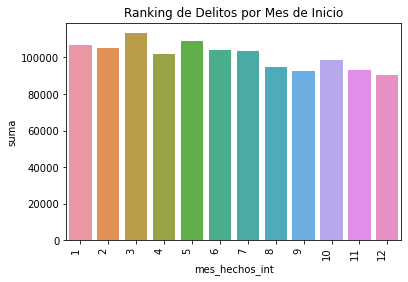

In [271]:
ax=sns.barplot(y=rank("mes_hechos_int")["suma"], x=rank("mes_hechos_int")["mes_hechos_int"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de Delitos por Mes de Inicio")
#fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
plt.show()

<div class="alert-success"> 
Si tener en cuenta la distribución anual, la frecuencia del delito por mes, se ve sin alteraciones significativas mes a mes


In [33]:
#ranking de delitos por tipo de delito
pd.set_option('display.max_rows',500)
rank("delito").iloc[0:35]

,delito,suma,cum_sum
0,VIOLENCIA FAMILIAR,128801,0.11
1,FRAUDE,76105,0.17
2,ROBO DE OBJETOS,72948,0.23
3,AMENAZAS,67999,0.28
4,ROBO A NEGOCIO SIN VIOLENCIA,66763,0.34
5,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,61964,0.39
6,ROBO DE ACCESORIOS DE AUTO,40198,0.42
7,DENUNCIA DE HECHOS,36390,0.45
8,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,34661,0.48
9,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,31604,0.51


<div class="alert-success"> 
El 80% de los delitos se suceden en 34 tipos distintos de registros, sobre un total de 342 valores que adopta esta variale. 
Aproximadamente el 80% se da en el 10% de los tipos de delitos
 </div> 


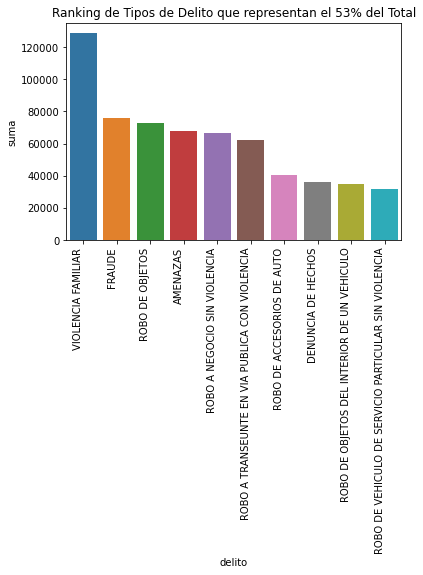

In [34]:
ax=sns.barplot(y=rank("delito")["suma"].iloc[0:10], x=rank("delito")["delito"].iloc[0:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de Tipos de Delito que representan el 53% del Total")
plt.show()

<div class="alert-success"> 
De los delitos que conforman el 50% del total de la base, el principal tipo de delito es VIOLENCIA FAMILIAR, luego se identifican dos bloques de comportamiento similar 
 </div> 


In [272]:
#ranking por fiscalias
rank("fiscalia").iloc[0:23]

,fiscalia,suma,cum_sum
0,INVESTIGACIÓN EN CUAUHTEMOC,112291,0.09
1,INVESTIGACIÓN EN IZTAPALAPA,110824,0.18
2,INVESTIGACIÓN EN GUSTAVO A. MADERO,74029,0.24
3,INVESTIGACIÓN EN BENITO JUÁREZ,73029,0.30
4,INVESTIGACIÓN EN COYOACÁN,52847,0.35
5,INVESTIGACIÓN EN ÁLVARO OBREGÓN,52538,0.39
6,INVESTIGACIÓN EN MIGUEL HIDALGO,51677,0.43
7,INVESTIGACIÓN EN TLALPAN,46560,0.47
8,INVESTIGACIÓN EN VENUSTIANO CARRANZA,43433,0.51
9,INVESTIGACIÓN EN AZCAPOTZALCO,38893,0.54


<div class="alert-success"> 
Existen en la bae  73 Fiscalias, sin embargo el 80% de delito se concentra en 22. El 80% de delito se concentra en 30% de las fiscalías 
 </div> 


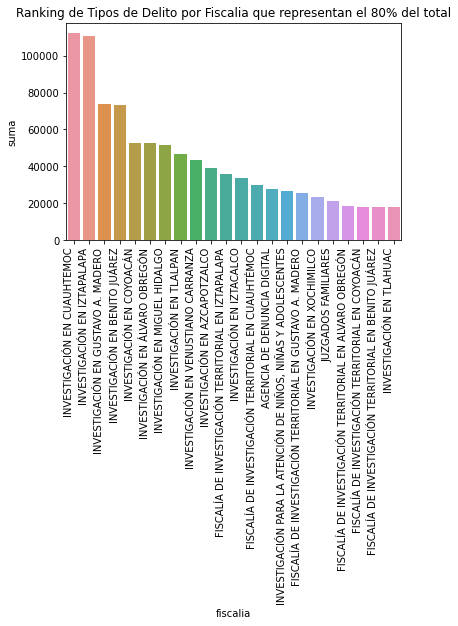

In [36]:
ax=sns.barplot(y=rank("fiscalia")["suma"].iloc[0:22], x=rank("fiscalia")["fiscalia"].iloc[0:22])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de Tipos de Delito por Fiscalia que representan el 80% del total")
plt.show()

<div class="alert-success"> 
Dentro del ranking de Fiscalías hay dos que son las que lideran la mayor cantidad de casos, con mas de 100.000 delitos registrados.
Le siguen otra dos con alrededor de 75.000 casos.
Luego el ranking es una curva descendente desde los 50.000 casos a los 16.000 
 </div> 


In [274]:
#ranking agencia
rank("agencia").iloc[0:53]

,agencia,suma,cum_sum
0,CUH-2,44296,0.04
1,IZP-6,33762,0.06
2,BJ-1,32442,0.09
3,BJ-3,32211,0.12
4,IZC-2,29547,0.14
5,IZP-8,29196,0.17
6,AZ-1,28092,0.19
7,CEN-1,27575,0.21
8,VC-3,26252,0.23
9,IZP-4,25681,0.25


<div class="alert-success"> 
Hay un total de 180 agencias, y el 80% de lo delitos registrados se registan en 52 agencias
 </div> 


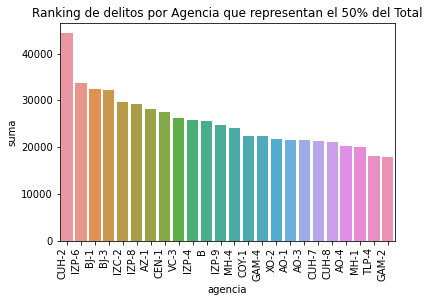

In [38]:
ax=sns.barplot(y=rank("agencia")["suma"].iloc[0:24], x=rank("agencia")["agencia"].iloc[0:24])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Agencia que representan el 50% del Total")
plt.show()

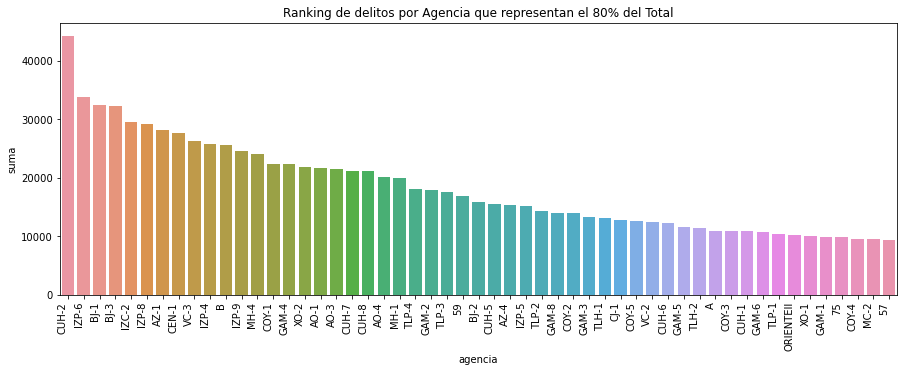

In [280]:
plt.figure(figsize=(15, 5))
ax=sns.barplot(y=rank("agencia")["suma"].iloc[0:53], x=rank("agencia")["agencia"].iloc[0:53])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Agencia que representan el 80% del Total")

plt.show()

<div class="alert-success"> 
De las agencias que representan el 80% del total de delito, la agencia CUH-2 acumula la mayor cantidad, con mas de 40,000 registros,
luego el ranking se muestra como una curva descendente que va desde los 33.000 registros hasta los 9.000 
 </div> 


In [39]:
#ranking unidad de investigacion
rank('unidad_investigacion').iloc[0:11]

,unidad_investigacion,suma,cum_sum
0,UI-1SD,316063,0.26
1,UI-2SD,174736,0.40
2,UI-1CD,161146,0.54
3,UI-3CD,149783,0.66
4,UI-3SD,146895,0.78
5,UI-2CD,145835,0.90
6,Unidad de Investigación 1 S/D,27575,0.92
7,1 SIN DETENIDO,8981,0.93
8,1 CON DETENIDO 1 C/D,5934,0.94
9,Unidad de investigación 7 S/D,5876,0.94


<div class="alert-success"> 
Hay un total de 128 unidades de investigación, existiendo una alta concentración siendo que el 95% del delito recae en 11 fiscalías. 
Y el 54% de delito solo tres fiscalias
 </div> 



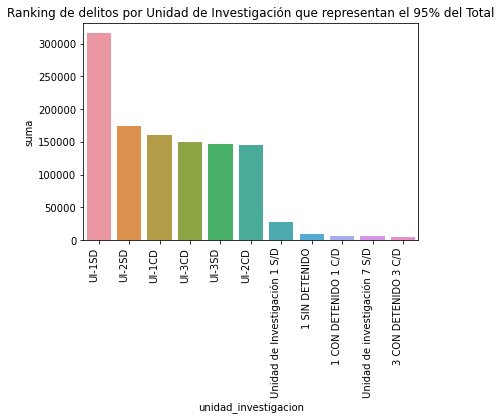

In [40]:
ax=sns.barplot(y=rank('unidad_investigacion')["suma"].iloc[0:11], x=rank('unidad_investigacion')['unidad_investigacion'].iloc[0:11])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Unidad de Investigación que representan el 95% del Total")
plt.show()

<div class="alert-success"> 
Con mas de 300.000 delitos registrados, la fiscalia UI-1SD lidera el ranking acumulado el 25% del total de delitos
 </div> 


In [282]:
#ranking de categoria de delitos
rank('categoria_delito')

,categoria_delito,suma,cum_sum
0,DELITO DE BAJO IMPACTO,957112,0.79
1,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,70760,0.85
2,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,64065,0.90
3,HECHO NO DELICTIVO,50066,0.94
4,ROBO A NEGOCIO CON VIOLENCIA,20561,0.96
5,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,12736,0.97
6,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,10978,0.98
7,HOMICIDIO DOLOSO,6184,0.98
8,VIOLACIÓN,5349,0.99
9,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,4370,0.99


<div class="alert-success"> 
La categoría de delito BAJO IMPACTO acumula el 79% del total de los delitos registrados
 </div> 


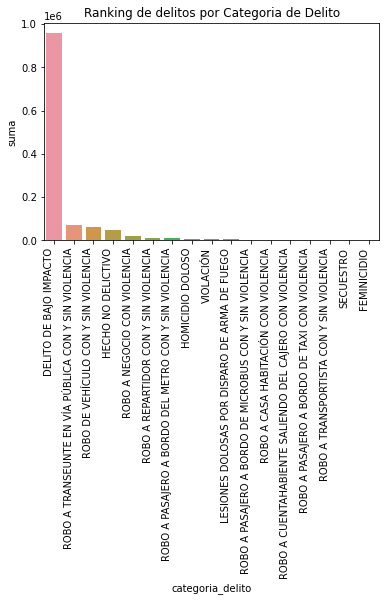

In [42]:
ax=sns.barplot(y=rank('categoria_delito')["suma"], x=rank('categoria_delito')['categoria_delito'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Categoria de Delito")
plt.show()

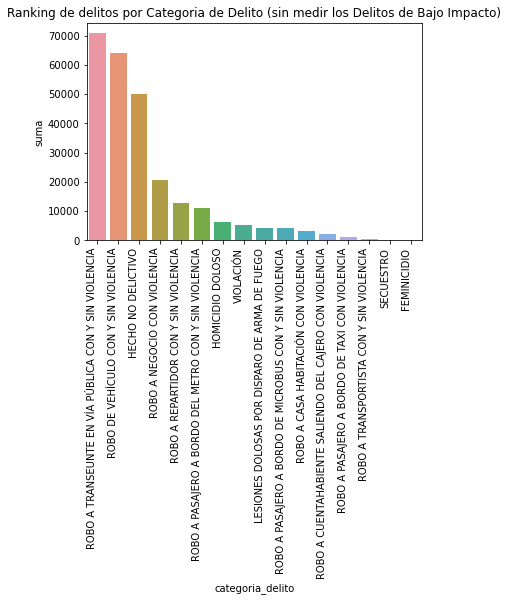

In [286]:
ax=sns.barplot(y=rank('categoria_delito')["suma"].iloc[1:], x=rank('categoria_delito')['categoria_delito'].iloc[1:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Categoria de Delito (sin medir los Delitos de Bajo Impacto)")
plt.show()

<div class="alert-success"> 
Graficamos el resto de las categorías de delitos que no son de Bajo Impacto para poder apreciar mejor su distribución. 
Lass tres principales categorias de delitos de este gráfico están por encima de los 50.000 registros
El resto de tiene notoriamente menos registros yendo desde los 20.000 hasta un solo registro en Femicidio
Respecto de los Femicidios corresponde revisar esta categorizaicón, es notorio que en toda la serie se presente una sola vez
 </div> 


In [288]:
#ranking colonia
pd.set_option('display.max_rows', 2000)
rank('colonia_hechos').iloc[0:150]

,colonia_hechos,suma,cum_sum
0,CENTRO,41313,0.03
1,DOCTORES,24425,0.05
2,DEL VALLE CENTRO,18217,0.07
3,ROMA NORTE,15210,0.08
4,NARVARTE,13264,0.09
5,BUENAVISTA,12115,0.10
6,MORELOS,11304,0.11
7,POLANCO,10509,0.12
8,JUÁREZ,10472,0.13
9,AGRÍCOLA ORIENTAL,10271,0.14


<div class="alert-success"> 
Hay un total de 1637 Colonias, el 50% del delito se registra en aproximadamente 150 Colonias (9% del total)
 </div> 


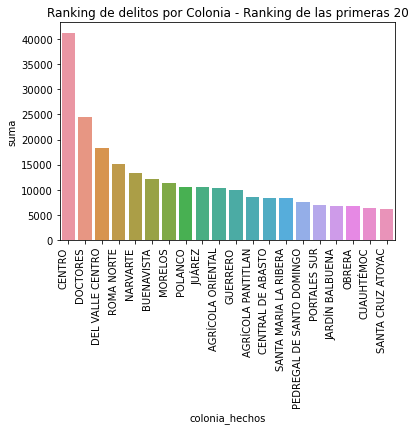

In [289]:
ax=sns.barplot(y=rank('colonia_hechos')["suma"].iloc[0:20], x=rank('colonia_hechos')['colonia_hechos'].iloc[0:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Colonia - Ranking de las primeras 20")
plt.show()

<div class="alert-success"> 
La colonia CENTRO, lidera el ranking de las primeras 20, con algo mas de 40.000 registros. La segunda es Doctores con alrededor de 25.000 registros.
El resto de las colonias del Top 20, tienen menos de 20.000 registros cayendo hasta los 5.500 registros aproximadamente
 </div> 


In [44]:
#ranking alcaldía
rank('alcaldia_hechos')

,alcaldia_hechos,suma,cum_sum
0,CUAUHTEMOC,187056,0.15
1,IZTAPALAPA,181725,0.30
2,GUSTAVO A MADERO,122769,0.40
3,BENITO JUAREZ,102829,0.49
4,ALVARO OBREGON,83710,0.56
5,COYOACAN,82958,0.63
6,MIGUEL HIDALGO,80696,0.69
7,TLALPAN,72568,0.75
8,VENUSTIANO CARRANZA,70360,0.81
9,AZCAPOTZALCO,60614,0.86


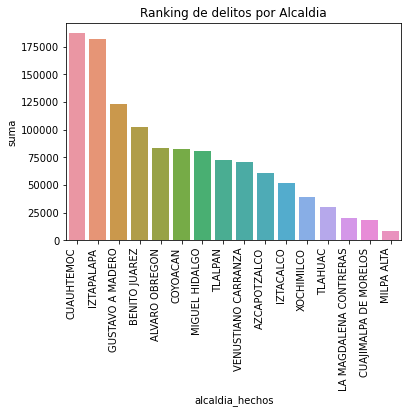

In [45]:
ax=sns.barplot(y=rank('alcaldia_hechos')["suma"], x=rank('alcaldia_hechos')['alcaldia_hechos'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Alcaldia")
plt.show()

<div class="alert-success"> 
Hay un total de 16 alcaldías, CUAUHTEMOC e IZTAPALAPA lideran el ranking con mas de 175.000 registros. Le sigen en importancia GUSTAVO MADERO Y BENITO JUAREZ con mas de 100.000 registros,
El resto de las fiscalías cae por debajo de los 100.000 registros hasta 8,700
 </div> 


In [46]:
rank("competencia")

,competencia,suma,cum_sum
0,FUERO COMUN,191957,0.16
1,HECHO NO DELICTIVO,2974,0.16
2,INCOMPETENCIA,191,0.16


<div class="alert-warning"> 
El cum_sum de competencia sale mal porque ese campo tiene muchos valores nulos
</div>  


<a id="section6"></a> 
### 6-Identificación de Delitos en Alza y Baja

[volver a TOC](#section_toc)

Dada que existen muchos tipos de delitos, se hace difífil el análisis, vamos a trabajar con las categorías de delito que son en total 17

In [290]:
#calculo la cantidad categorias de delito por año
year_grouped=data.groupby("ao_hechos")

In [291]:
#calculo la cantidad categorias de delito por año
year_grouped["ao_hechos"].count()

ao_hechos
1906         1
1915         2
1930         1
1942         1
1950         2
1952         1
1954         1
1955         3
1956         2
1957         1
1958         2
1960         1
1962         3
1963         3
1964         2
1965         2
1966         2
1967         1
1968         2
1969        19
1970         3
1971         2
1972         7
1973         2
1974         8
1975         4
1976         5
1977         2
1978         2
1979         2
1980         5
1981         6
1982         7
1983        13
1984        16
1985         8
1986        11
1987        15
1988         8
1989        24
1990        23
1991        17
1992        27
1993        19
1994        20
1995        28
1996        25
1997        30
1998        46
1999        34
2000        86
2001       179
2002        90
2003        96
2004       135
2005       162
2006       224
2007       268
2008       405
2009       425
2010       794
2011       929
2012      1356
2013      1935
2014      3897
2015     15014


<AxesSubplot:title={'center':'Cantida de Delitos por el campo ao_hechos'}, xlabel='ao_hechos'>

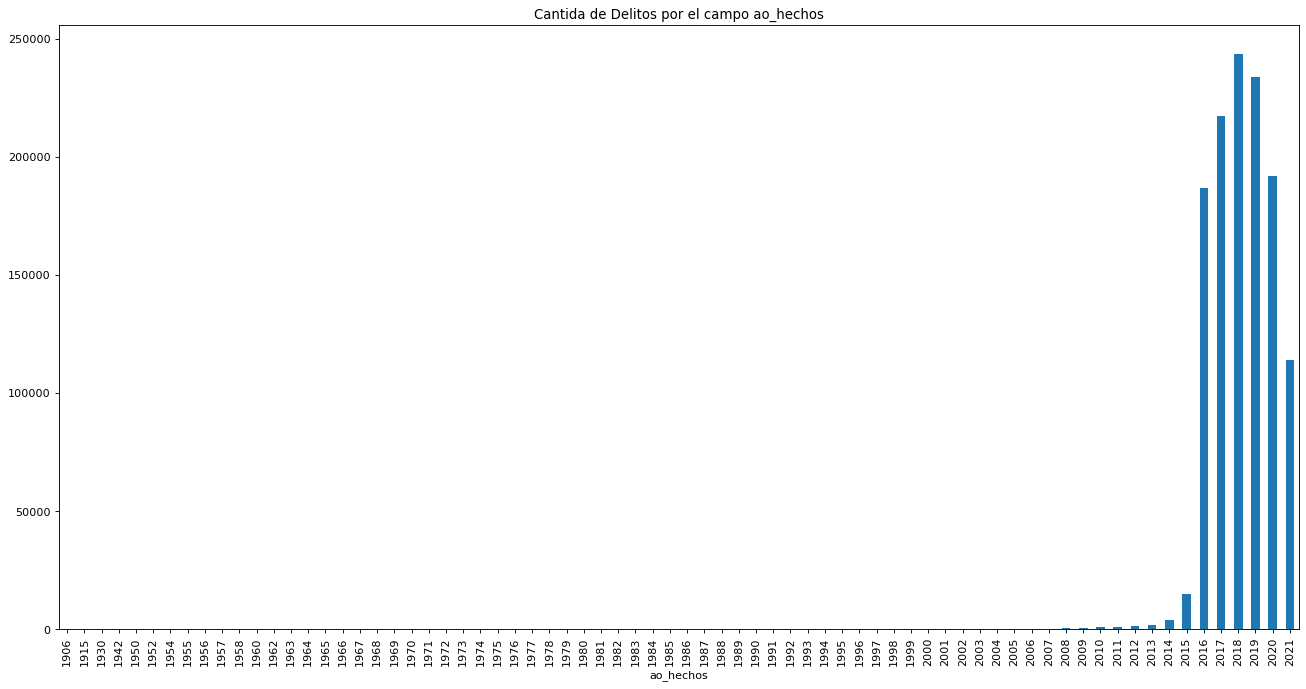

In [297]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
ax.set_title("Cantida de Delitos por el campo ao_hechos")
year_grouped["ao_hechos"].count().plot(kind="bar")

<div class="alert-danger"> 
Hay muy pocos registros para los años anteriores a 2016.
</div>  


<div class="alert-danger"> 
para el análisis de tendnecia tomo el campo "ao_inicio" que no presenta el problema de "ao_hechos
</div>  

In [50]:
#agrupo por año y categoria de delito
delitos_anual_gby=data.groupby("ao_inicio")["categoria_delito"].value_counts()
#armo un dataframe con los datos del groupby
delitos_anual_df=delitos_anual_gby.unstack()
delitos_anual_df

categoria_delito,DELITO DE BAJO IMPACTO,FEMINICIDIO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
ao_inicio,,,,,,,,,,,,,,,,,
2016,149121.0,NaN,12675.0,877.0,684.0,483.0,394.0,2577.0,746.0,177.0,760.0,1599.0,7026.0,165.0,11697.0,32.0,509.0
2017,170684.0,NaN,18169.0,981.0,872.0,431.0,345.0,2746.0,742.0,157.0,1841.0,1803.0,7946.0,116.0,11183.0,16.0,281.0
2018,179613.0,NaN,10409.0,1328.0,1017.0,558.0,367.0,4542.0,810.0,199.0,4510.0,2274.0,24100.0,78.0,13908.0,32.0,1089.0
2019,190007.0,NaN,3784.0,1333.0,841.0,753.0,657.0,5582.0,1084.0,390.0,2708.0,3444.0,15413.0,125.0,12890.0,65.0,1144.0
2020,160042.0,1.0,3041.0,1118.0,638.0,630.0,361.0,3496.0,483.0,148.0,724.0,2323.0,10102.0,77.0,9938.0,25.0,1261.0
2021,107645.0,NaN,1988.0,547.0,318.0,301.0,199.0,1618.0,230.0,132.0,435.0,1293.0,6173.0,47.0,4449.0,5.0,1065.0


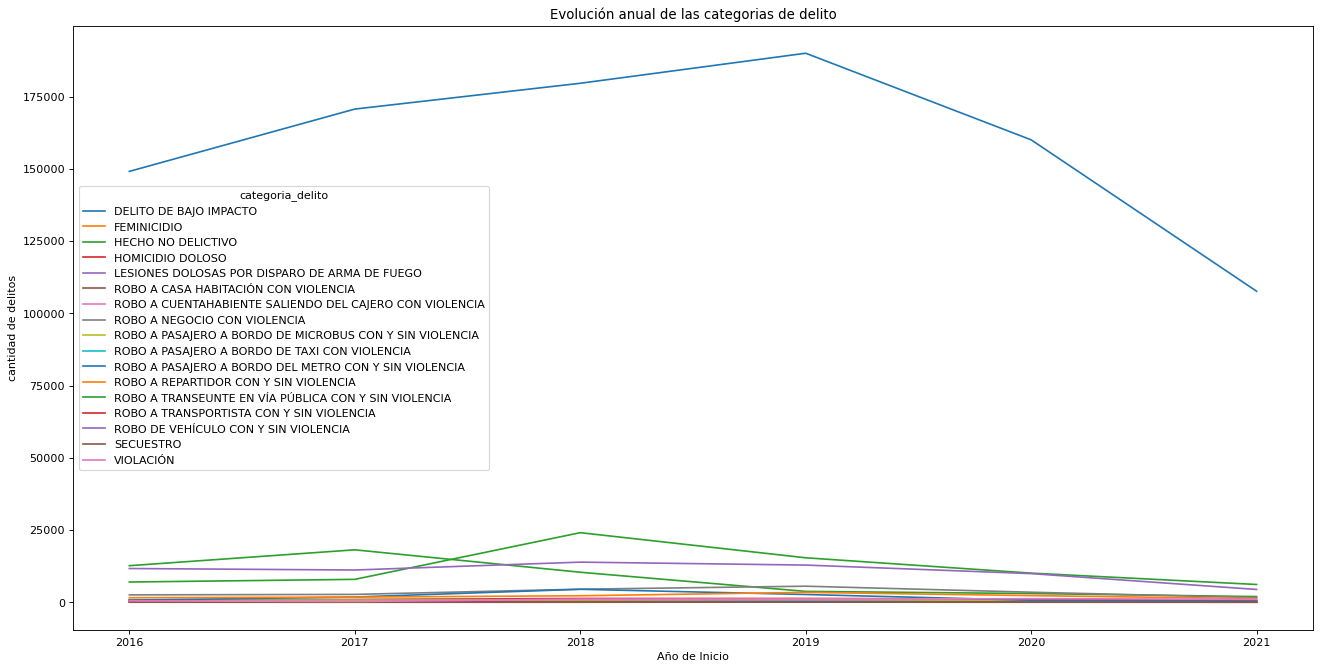

In [51]:
#grafico los datos del dataframe anterior
fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
delitos_anual_df.plot(kind="line", ax=ax)
ax.set_title("Evolución anual de las categorias de delito")
ax.set_ylabel("cantidad de delitos")
ax.set_xlabel("Año de Inicio")

plt.show()

<div class="alert-success"> 
En este gráfico no se puede observar bien la evolucion de todas las categorias porque hay mucha diferencia en la frecuencia de delitos 
de cada una de las categorias, es necesario revisar el ranking y graficarlas en distintos grupos
 </div> 


In [52]:
#consultamos el ranking de categorias delitos
rank('categoria_delito')

,categoria_delito,suma,cum_sum
0,DELITO DE BAJO IMPACTO,957112,0.79
1,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,70760,0.85
2,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,64065,0.90
3,HECHO NO DELICTIVO,50066,0.94
4,ROBO A NEGOCIO CON VIOLENCIA,20561,0.96
5,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,12736,0.97
6,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,10978,0.98
7,HOMICIDIO DOLOSO,6184,0.98
8,VIOLACIÓN,5349,0.99
9,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,4370,0.99


In [53]:
#hago un slice del ranking para poder graficar mejor - parte 1
rank_delito_rank_1=rank('categoria_delito')["categoria_delito"].iloc[0]
rank_delito_rank_1

'DELITO DE BAJO IMPACTO'

In [54]:
#hago un slice del ranking para poder graficar mejor - parte 2
rank_delito_rank_2=rank('categoria_delito')["categoria_delito"].iloc[1:7]
rank_delito_rank_2

1    ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...
2                 ROBO DE VEHÍCULO CON Y SIN VIOLENCIA
3                                   HECHO NO DELICTIVO
4                         ROBO A NEGOCIO CON VIOLENCIA
5                ROBO A REPARTIDOR CON Y SIN VIOLENCIA
6    ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...
Name: categoria_delito, dtype: object

In [55]:
#hago un slice del ranking para poder graficar mejor - parte 3
rank_delito_rank_3=rank('categoria_delito')["categoria_delito"].iloc[7:14]
rank_delito_rank_3

7                                      HOMICIDIO DOLOSO
8                                             VIOLACIÓN
9         LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO
10    ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...
11                 ROBO A CASA HABITACIÓN CON VIOLENCIA
12    ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...
13        ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA
Name: categoria_delito, dtype: object

In [56]:
#hago un slice del ranking para poder graficar mejor - parte 4
rank_delito_rank_4=rank('categoria_delito')["categoria_delito"].iloc[14:]
rank_delito_rank_4

14    ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA
15                                   SECUESTRO
16                                 FEMINICIDIO
Name: categoria_delito, dtype: object

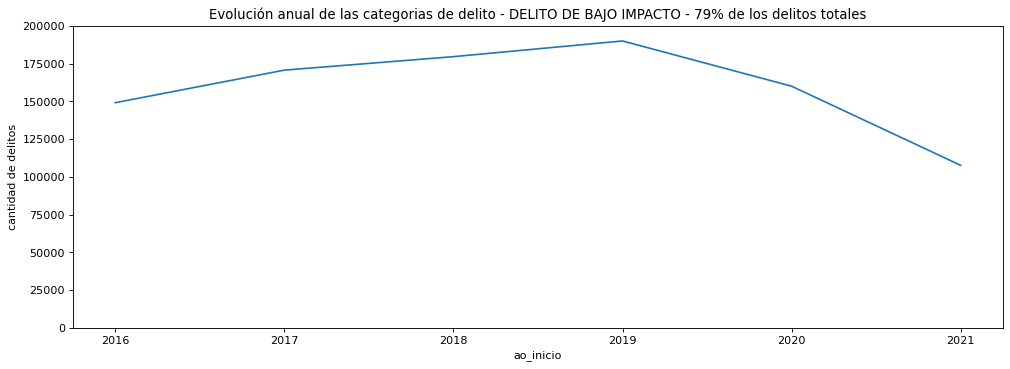

In [57]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=80)
ax.set_title("Evolución anual de las categorias de delito - DELITO DE BAJO IMPACTO - 79% de los delitos totales")
ax.set_ylabel("cantidad de delitos")
ax.set_xlabel("Año de Inicio")
ax.set_ylim(0,200000)
delitos_anual_df[rank_delito_rank_1].plot(kind="line", ax=ax)
plt.show()


<div class="alert-success"> 
En los delitos de Bajo Impacto se ven una tendencia creciente hasta el 2019, y luego una clara tendencia a la baja hasta el final de la serie
 </div> 


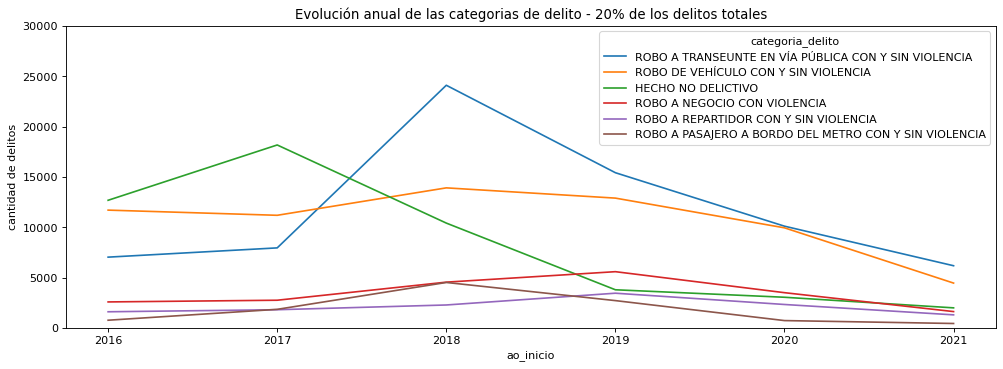

In [58]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=80)
ax.set_title("Evolución anual de las categorias de delito - 20% de los delitos totales")
ax.set_ylabel("cantidad de delitos")
ax.set_xlabel("Año de Inicio")
ax.set_ylim(0,30000)
delitos_anual_df[rank_delito_rank_2].plot(kind="line", ax=ax)
plt.show()

<div class="alert-success"> 
En este gráfico se aprecia que en mayor o menor media en los últimos años todos los tipos de delitos tienen a la baja
    Desde el 2016 donde comienza la serie, se muestra un aumento en todos los casos, luego esta tendencia se revierte (en distintos momentos según cada categoría de delito)
 </div> 


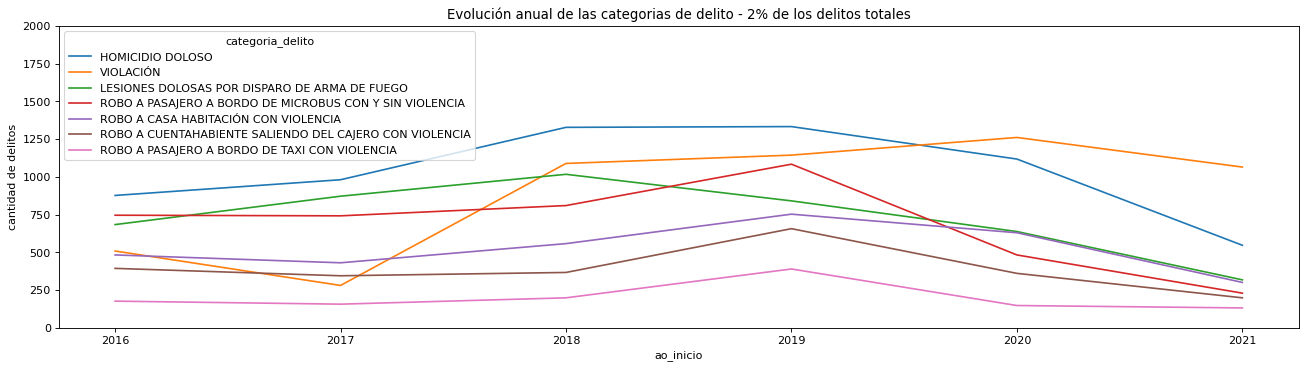

In [59]:
fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
ax.set_title("Evolución anual de las categorias de delito - 2% de los delitos totales")
ax.set_ylabel("cantidad de delitos")
ax.set_xlabel("Año de Inicio")
ax.set_ylim(0,2000)
delitos_anual_df[rank_delito_rank_3].plot(kind="line", ax=ax)
plt.show()

<div class="alert-success"> 
Salvo del delito de VIOLACION el resto de los delitos en mayor o menor media se manifiestan a la baja en los ultimos años. En general han tendido a crecer desde el incio de la serie, y luego muestran una caída, mas o menos pronuciada según la categoría.
    Para el caso particular de la categoría VIOLACION, desde el 2017 se presenta como un delito cada vez mas frecuente
 </div> 


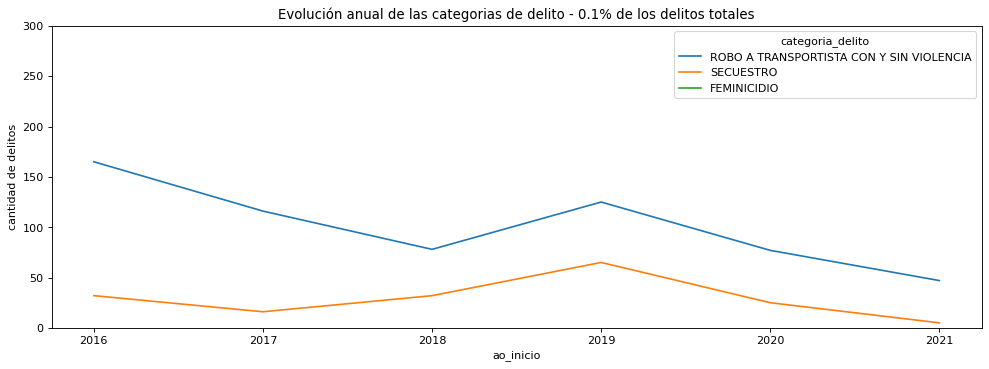

In [60]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=80)
ax.set_title("Evolución anual de las categorias de delito - 0.1% de los delitos totales")
ax.set_ylabel("cantidad de delitos")
ax.set_xlabel("Año de Inicio")
ax.set_ylim(0,300)
delitos_anual_df[rank_delito_rank_4].plot(kind="line", ax=ax)
plt.show()

<div class="alert-success"> 
Estas últimas dos categorías en general han tendido a crecer desde el incio de la serie, y luego muestran una caída, mas o menos pronuciada según la categoría.
   La categoría FEMICIDIOS debe ser revisada proque tiene un solo registro en toda la serie. No sería consistene la inexitencia de FEMICIDIOS cuando se reporta que están creciendo las VIOLACIONES, son delitos que deberían estar altamente correlacionas
 </div> 



<a id="section7"></a> 
### 7-Ranking Alcaldias

[volver a TOC](#section_toc)

Dada que existen muchos tipos de delitos, se hace difífil el análisis, vamos a trabajar con las categorías de delito que son en total 17

In [61]:
#consultamos el ranking de alcaldías
rank("alcaldia_hechos")

,alcaldia_hechos,suma,cum_sum
0,CUAUHTEMOC,187056,0.15
1,IZTAPALAPA,181725,0.30
2,GUSTAVO A MADERO,122769,0.40
3,BENITO JUAREZ,102829,0.49
4,ALVARO OBREGON,83710,0.56
5,COYOACAN,82958,0.63
6,MIGUEL HIDALGO,80696,0.69
7,TLALPAN,72568,0.75
8,VENUSTIANO CARRANZA,70360,0.81
9,AZCAPOTZALCO,60614,0.86


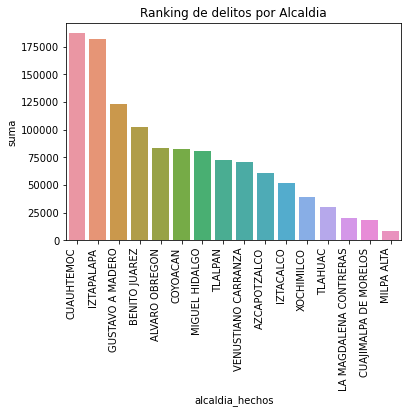

In [62]:
#graficamos los delitos por alcaldía
ax=sns.barplot(y=rank('alcaldia_hechos')["suma"], x=rank('alcaldia_hechos')['alcaldia_hechos'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Ranking de delitos por Alcaldia")
plt.show()

<div class="alert-success"> 
La alcaldía con mayor cantida de delitos registrados son CUAUHTEMOC e IZTAPALAPA, juntas representan el 30% del delito total.
La alcaldía con menor cantidad de delitos registrados es MILPA ALTA con 8.768, menos del 1% del total de delitos registrados
 </div> 


In [331]:
#analizo que alcaldías abarca la colonia con mayor densidad de delito
data_centro=data[data["colonia_hechos"]=="CENTRO"]
data_centro.groupby("alcaldia_hechos")["alcaldia_hechos"].count()

alcaldia_hechos
CUAUHTEMOC             41307
VENUSTIANO CARRANZA        6
Name: alcaldia_hechos, dtype: int64

<div class="alert-success"> 
La alcaldía CUAUHTEMOC lidera el ranking poruque incluye la colonia CENTRO que es la que lidera el ranking de cantidad de delitos
 </div> 


In [334]:
#analizo que otras colonia incluye la alcaldía CUAUHTEMOC
data_CHAU=data[data["alcaldia_hechos"]=="CUAUHTEMOC"]
data_CHAU.groupby("colonia_hechos")["colonia_hechos"].count()

colonia_hechos
ALGARIN                         1139
AMPLIACIÓN ASTURIAS             1215
ASTURIAS                         687
ATLAMPA                         1951
BUENAVISTA                     10061
BUENOS AIRES                    1154
CENTRO                         41307
CENTRO URBANO BENITO JUÁREZ      347
CONDESA                         2650
CUAUHTÉMOC                      5780
DOCTORES                       24424
ESPERANZA                        570
EX-HIPÓDROMO DE PERALVILLO      2156
FELIPE PESCADOR                  267
GUERRERO                        9926
HIPÓDROMO                       5616
HIPÓDROMO CONDESA               1204
JUÁREZ                         10471
MAZA                             614
MORELOS                         6876
NICOLÁS BRAVO                      1
NONOALCO TLATELOLCO             3607
OBRERA                          6666
PAULINO NAVARRO                  601
PERALVILLO                      3172
ROMA NORTE                     15210
ROMA SUR               

<div class="alert-success"> 
La alcalcía CHAUTEMOC incluye 3 las colonias que figuran top 5 en el ranking de colonias con mas cantidad de delitos: CENTRO, DOCTORES, ROMA NORTE
 </div> 


In [63]:
#para analizar los delitos por alcaldía los agrupo en un group by
alcaldia_delitos_gby=data.groupby("alcaldia_hechos")["categoria_delito"].value_counts()
#genero un dataframe del groupby
alcaldia_delitos_df=alcaldia_delitos_gby.unstack().T
alcaldia_delitos_df.reset_index(inplace=True)
alcaldia_delitos_df

alcaldia_hechos,categoria_delito,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
0,DELITO DE BAJO IMPACTO,66978.0,48367.0,86846.0,68207.0,16449.0,149992.0,93395.0,38929.0,133287.0,17400.0,63774.0,7400.0,22852.0,59988.0,53275.0,29973.0
1,FEMINICIDIO,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HECHO NO DELICTIVO,3365.0,1816.0,3649.0,3192.0,617.0,9861.0,5036.0,2399.0,7389.0,789.0,2705.0,315.0,934.0,2481.0,4304.0,1214.0
3,HOMICIDIO DOLOSO,449.0,239.0,97.0,236.0,61.0,631.0,999.0,237.0,1365.0,105.0,241.0,68.0,273.0,480.0,437.0,266.0
4,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,328.0,250.0,128.0,199.0,32.0,480.0,603.0,235.0,1029.0,62.0,254.0,28.0,139.0,201.0,284.0,118.0
5,ROBO A CASA HABITACIÓN CON VIOLENCIA,296.0,182.0,155.0,175.0,77.0,200.0,372.0,107.0,510.0,124.0,174.0,23.0,132.0,295.0,167.0,167.0
6,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,164.0,136.0,229.0,146.0,22.0,284.0,296.0,122.0,286.0,14.0,312.0,6.0,42.0,87.0,141.0,36.0
7,ROBO A NEGOCIO CON VIOLENCIA,1739.0,1052.0,1263.0,975.0,144.0,2315.0,2381.0,1072.0,3863.0,240.0,1921.0,50.0,658.0,946.0,1226.0,716.0
8,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,130.0,165.0,72.0,232.0,7.0,119.0,550.0,509.0,1453.0,15.0,231.0,9.0,160.0,83.0,221.0,139.0
9,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,125.0,38.0,71.0,61.0,7.0,200.0,119.0,55.0,174.0,13.0,127.0,4.0,22.0,47.0,106.0,34.0


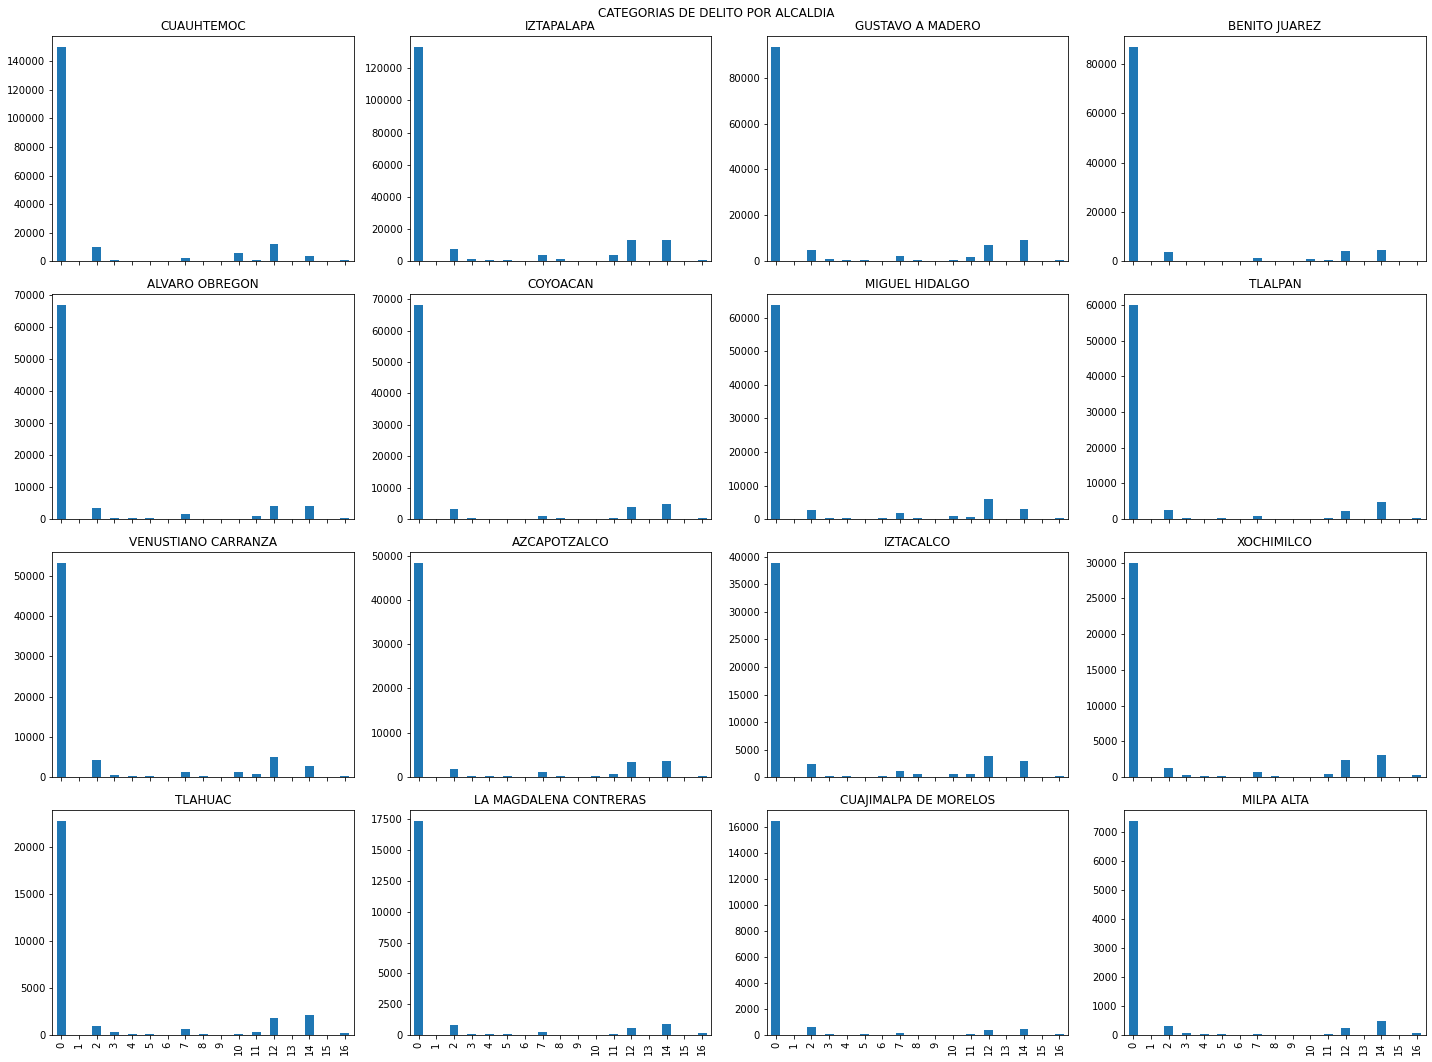

In [342]:
fig,ax=plt.subplots(4,4, figsize=(20,15),sharey=False, sharex=True)
alcaldia_delitos_df["CUAUHTEMOC"].plot(kind="bar", ax=ax[0,0], title="CUAUHTEMOC")
alcaldia_delitos_df["IZTAPALAPA"].plot(kind="bar", ax=ax[0,1],title="IZTAPALAPA")
alcaldia_delitos_df["GUSTAVO A MADERO"].plot(kind="bar", ax=ax[0,2],title="GUSTAVO A MADERO")
alcaldia_delitos_df["BENITO JUAREZ"].plot(kind="bar", ax=ax[0,3],title="BENITO JUAREZ")
alcaldia_delitos_df["ALVARO OBREGON"].plot(kind="bar", ax=ax[1,0],title="ALVARO OBREGON")
alcaldia_delitos_df["COYOACAN"].plot(kind="bar", ax=ax[1,1],title="COYOACAN")
alcaldia_delitos_df["MIGUEL HIDALGO"].plot(kind="bar", ax=ax[1,2],title="MIGUEL HIDALGO")
alcaldia_delitos_df["TLALPAN"].plot(kind="bar", ax=ax[1,3], title="TLALPAN")
alcaldia_delitos_df["VENUSTIANO CARRANZA"].plot(kind="bar", ax=ax[2,0],title="VENUSTIANO CARRANZA")
alcaldia_delitos_df["AZCAPOTZALCO"].plot(kind="bar", ax=ax[2,1] ,title="AZCAPOTZALCO")
alcaldia_delitos_df["IZTACALCO"].plot(kind="bar", ax=ax[2,2],title="IZTACALCO")
alcaldia_delitos_df["XOCHIMILCO"].plot(kind="bar", ax=ax[2,3],title="XOCHIMILCO")
alcaldia_delitos_df["TLAHUAC"].plot(kind="bar", ax=ax[3,0],title="TLAHUAC")
alcaldia_delitos_df["LA MAGDALENA CONTRERAS"].plot(kind="bar", ax=ax[3,1],title="LA MAGDALENA CONTRERAS")
alcaldia_delitos_df["CUAJIMALPA DE MORELOS"].plot(kind="bar", ax=ax[3,2],title="CUAJIMALPA DE MORELOS")
alcaldia_delitos_df["MILPA ALTA"].plot(kind="bar", ax=ax[3,3],title="MILPA ALTA")
plt.suptitle('CATEGORIAS DE DELITO POR ALCALDIA') 
plt.tight_layout()
plt.show()

<div class="alert-success"> 
En las 16 alcaldías de da con mayor frecuencia la categoría de delito de BAJO IMPACTO. Con mucha menor frecuena, también se dan en todas las fiscalías las categorias de HECHO NO DELICTIVO, ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA, ROBO DE VEHÍCULO CON Y SIN VIOLENCIA 
 </div> 


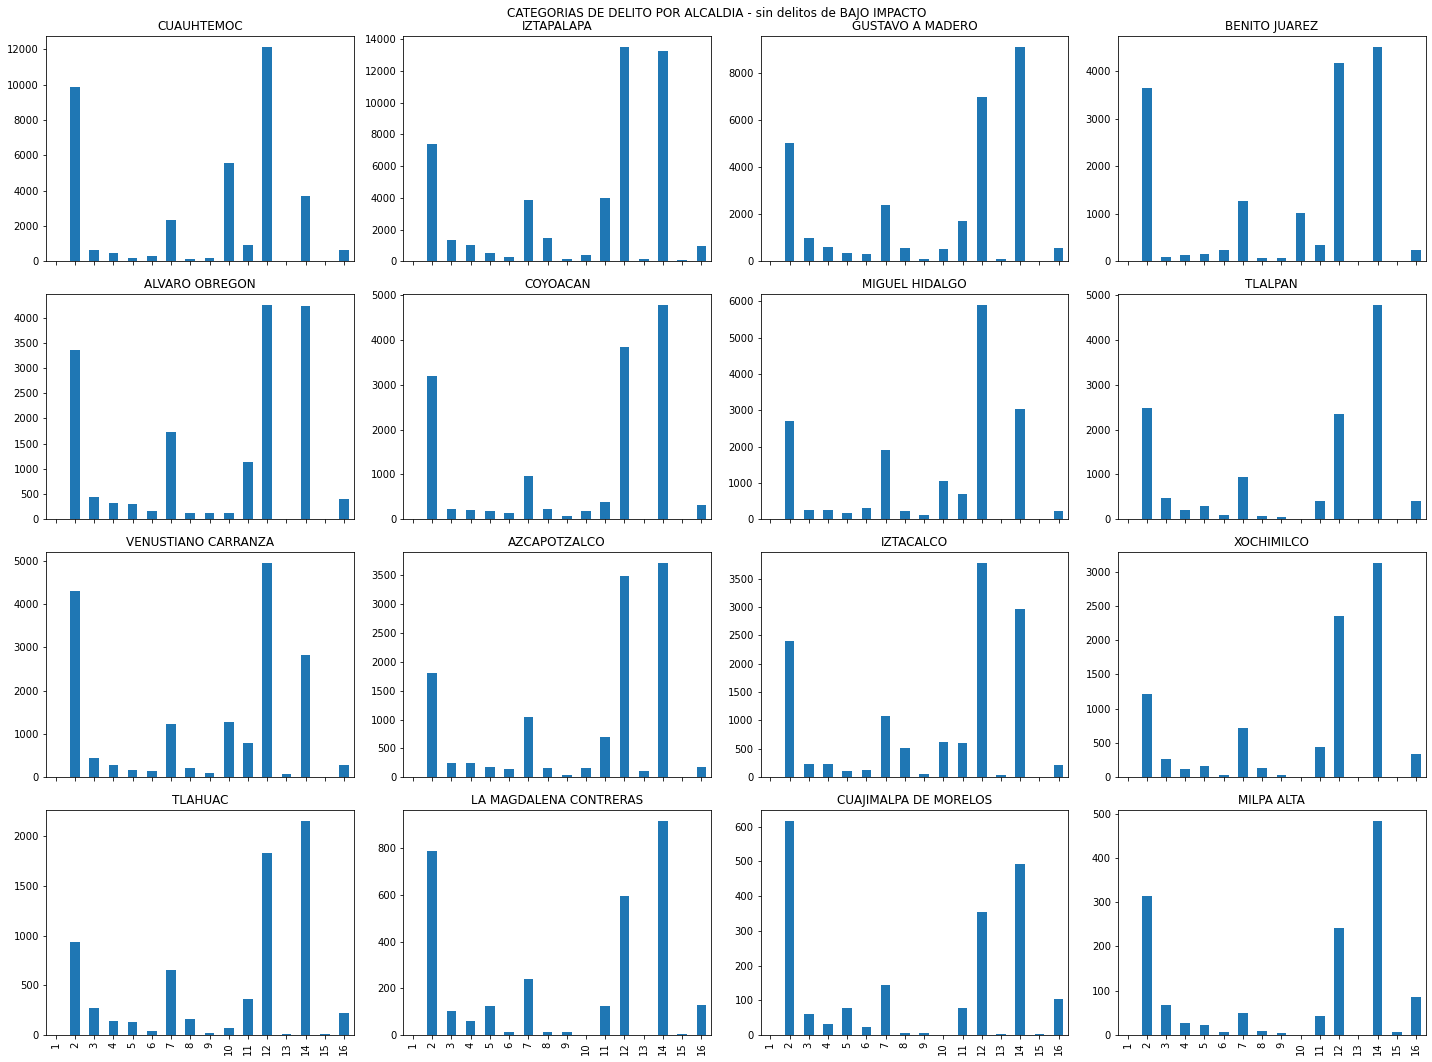

In [343]:
#DEJO FUERA DEL ANALISIS LOS DELITOS DE BAJO IMPACTO
alcaldia_delitos_df_2=alcaldia_delitos_df.iloc[1:]
fig,ax=plt.subplots(4,4, figsize=(20,15),sharey=False, sharex=True)
alcaldia_delitos_df_2["CUAUHTEMOC"].plot(kind="bar", ax=ax[0,0], title="CUAUHTEMOC")
alcaldia_delitos_df_2["IZTAPALAPA"].plot(kind="bar", ax=ax[0,1],title="IZTAPALAPA")
alcaldia_delitos_df_2["GUSTAVO A MADERO"].plot(kind="bar", ax=ax[0,2],title="GUSTAVO A MADERO")
alcaldia_delitos_df_2["BENITO JUAREZ"].plot(kind="bar", ax=ax[0,3],title="BENITO JUAREZ")
alcaldia_delitos_df_2["ALVARO OBREGON"].plot(kind="bar", ax=ax[1,0],title="ALVARO OBREGON")
alcaldia_delitos_df_2["COYOACAN"].plot(kind="bar", ax=ax[1,1],title="COYOACAN")
alcaldia_delitos_df_2["MIGUEL HIDALGO"].plot(kind="bar", ax=ax[1,2],title="MIGUEL HIDALGO")
alcaldia_delitos_df_2["TLALPAN"].plot(kind="bar", ax=ax[1,3], title="TLALPAN")
alcaldia_delitos_df_2["VENUSTIANO CARRANZA"].plot(kind="bar", ax=ax[2,0],title="VENUSTIANO CARRANZA")
alcaldia_delitos_df_2["AZCAPOTZALCO"].plot(kind="bar", ax=ax[2,1] ,title="AZCAPOTZALCO")
alcaldia_delitos_df_2["IZTACALCO"].plot(kind="bar", ax=ax[2,2],title="IZTACALCO")
alcaldia_delitos_df_2["XOCHIMILCO"].plot(kind="bar", ax=ax[2,3],title="XOCHIMILCO")
alcaldia_delitos_df_2["TLAHUAC"].plot(kind="bar", ax=ax[3,0],title="TLAHUAC")
alcaldia_delitos_df_2["LA MAGDALENA CONTRERAS"].plot(kind="bar", ax=ax[3,1],title="LA MAGDALENA CONTRERAS")
alcaldia_delitos_df_2["CUAJIMALPA DE MORELOS"].plot(kind="bar", ax=ax[3,2],title="CUAJIMALPA DE MORELOS")
alcaldia_delitos_df_2["MILPA ALTA"].plot(kind="bar", ax=ax[3,3],title="MILPA ALTA")
plt.suptitle('CATEGORIAS DE DELITO POR ALCALDIA - sin delitos de BAJO IMPACTO') 
plt.tight_layout()
plt.show()

<div class="alert-success"> 
En este gráfico donde se deja fuera el DELITO DE BAJO IMPACTO, se aprecia mucho mejor  que sse dan en todas las fiscalías las categorias de HECHO NO DELICTIVO, ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA, ROBO DE VEHÍCULO CON Y SIN VIOLENCIA 
 </div> 

In [73]:
#analizo el registro con categoria FEMICIDIO QUE TIENE UN SOLO VALOR
data[data["categoria_delito"]=="FEMINICIDIO"]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,...,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_hechos_int,mes_inicio_int
992890,2020,Marzo,2020-03-13 10:56:00,2020,Marzo,2020-03-13 10:56:00,HOMICIDIO DOLOSO,FISCALÍA DE INVESTIGACIÓN Y PERSECUCIÓN DE LOS...,A,UI-5SD,...,INDIANA,NaN,CIUDAD DE LOS DEPORTES,BENITO JUAREZ,NaN,-99.177987,19.385285,NaN,3,3


In [ ]:
#ELIMINO EL REGISTRO FEMICIDIO PARA NO TENER NULOS EN TABLA PIVOT
#data_clean=data.drop(index=992890)
#data_clean.pivot_table(index="categoria_delito", columns=["alcaldia_hechos"], aggfunc="count", margins=True, margins_name="totales")
#IGUAL SIGO TENIENDO NULOS,

<function matplotlib.pyplot.show(close=None, block=None)>

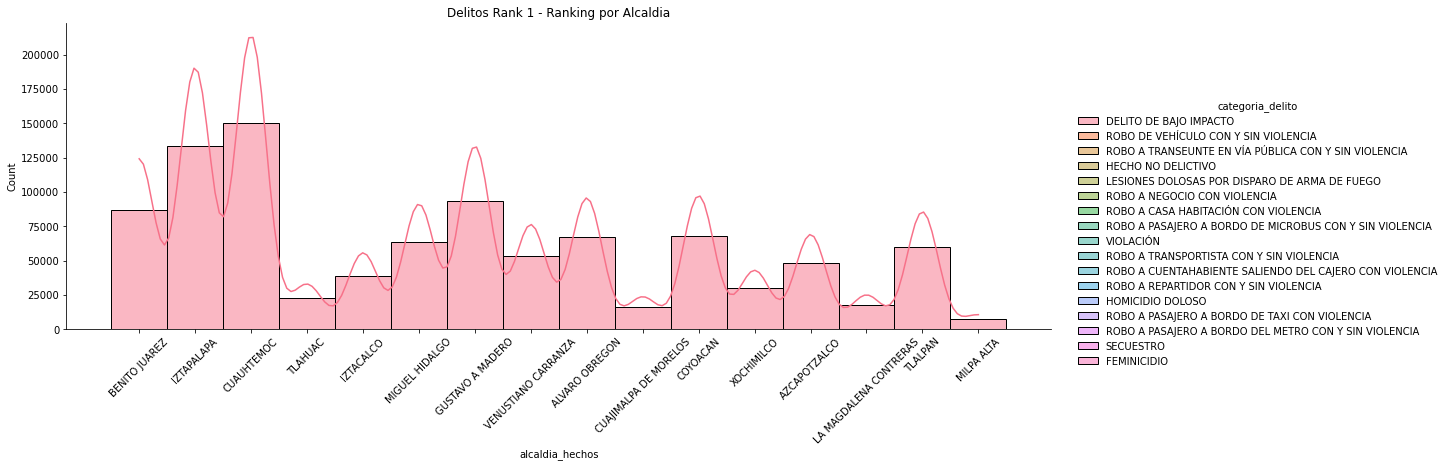

In [74]:
#hago una mascara con los delitos dle ranking1
data_rank1=data[data["categoria_delito"]==rank_delito_rank_1]
sns.displot( x=data_rank1["alcaldia_hechos"], kde=True, hue=data.categoria_delito,  aspect=30/10).set(title="Delitos Rank 1 - Ranking por Alcaldia")
plt.xticks(rotation=45)
plt.show


<div class="alert-success"> 
De las categorías de delito de BAJO IMPACTO, donde mas sucede es en la alcaldía CUAUHTEMOC, y donde menos sucede es en MILPA ALTA, acorde a lo visto en el ranking de alcladías
 </div> 


<function matplotlib.pyplot.show(close=None, block=None)>

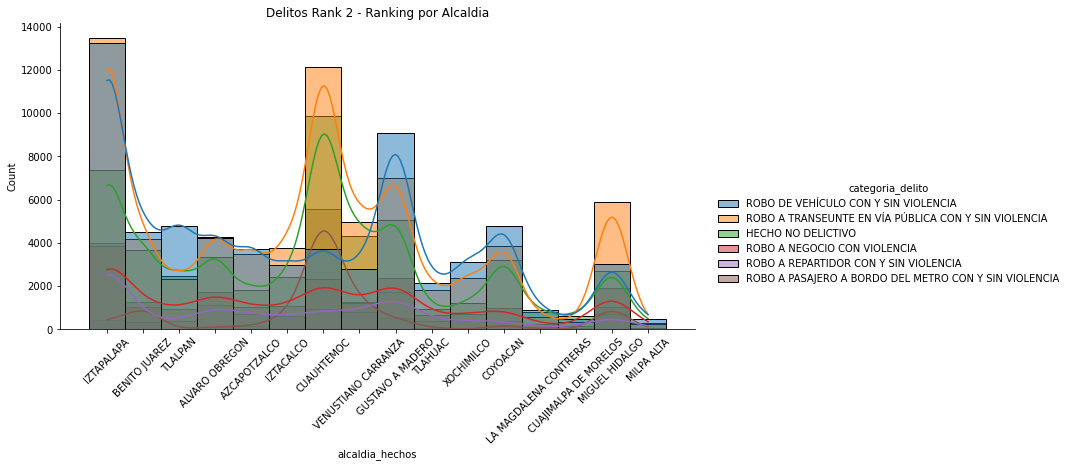

In [75]:
#hago una mascara con los delitos dle ranking2
data_rank2=data[data["categoria_delito"].isin(rank_delito_rank_2)]
sns.displot( x=data_rank2["alcaldia_hechos"],kde=True, hue=data_rank2.categoria_delito,  aspect=20/10).set(title="Delitos Rank 2 - Ranking por Alcaldia")
plt.xticks(rotation=45)
plt.show


<div class="alert-success"> 
para las categorias de delitos separados en Ranking 2, la alcaldñia con mayor delito es IZTAPALAPA, donde encabezan el ranking las categorias ROBO VEHICULO Y ROBO A TRANSEUNTE
 </div> 



<function matplotlib.pyplot.show(close=None, block=None)>

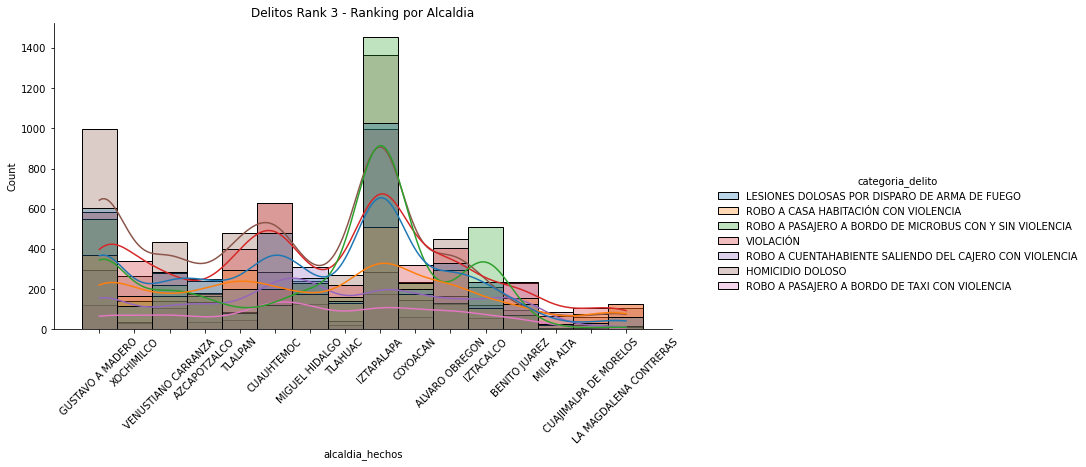

In [338]:
#hago una mascara con los delitos dle ranking3
data_rank3=data[data["categoria_delito"].isin(rank_delito_rank_3)]
displot=sns.displot( x=data_rank3["alcaldia_hechos"], kde=True, hue=data_rank3.categoria_delito,  aspect=20/10, alpha=0.3).set(title="Delitos Rank 3 - Ranking por Alcaldia")
plt.xticks(rotation=45)
plt.show

<div class="alert-success"> 
para las categorias de delitos separados en Ranking 3, la alcaldñia con mayor delito es IZTAPALAPA, donde encabezan el ranking las categorias ROBO A PASAJRO Y HOMICIDIO DOLOS
 </div> 


<a id="section8"></a> 
### 8-Tendencia Estacional

[volver a TOC](#section_toc)

In [116]:
#para analizar los delitos por mes los agrupo en un group by
mes_delitos_gby=data.groupby("ao_hechos")["mes_hechos_int"].value_counts()
#genero un dataframe del groupby
mes_delitos_df=mes_delitos_gby.unstack()
mes_delitos_df.reset_index(inplace=True)
#reemplazo con cero los nulos que surgen de los meses sin datos
mes_delitos_df=mes_delitos_df.fillna(0)
#convierto cada celda en una observacion (unpivot)
mes_delitos_df=mes_delitos_df.melt(id_vars=["ao_hechos"])
#ordeno por ano y mes
mes_delitos_df.sort_values(by=["ao_hechos","mes_hechos_int" ], inplace=True)
#reseteo el index depues de ordenar
mes_delitos_df.reset_index(drop=True, inplace=True)
mes_delitos_df.head(3)

,ao_hechos,mes_hechos_int,value
0,1906,1,0.0
1,1906,2,0.0
2,1906,3,0.0


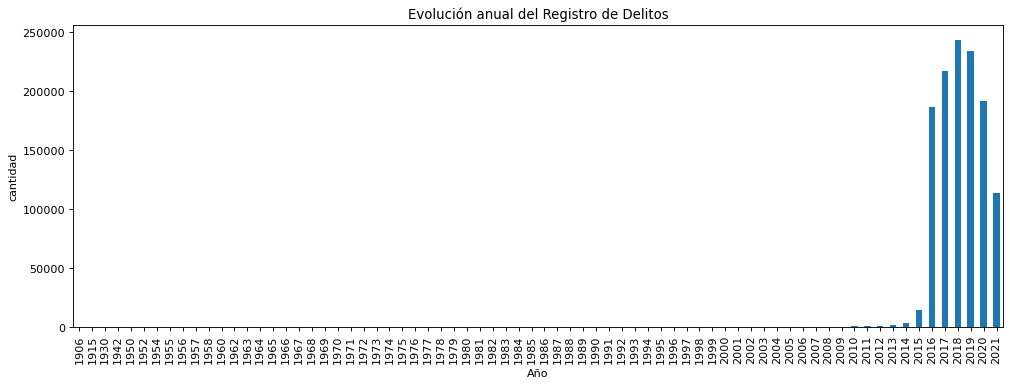

In [115]:
#grafico la cantidad de delitos por año de todo el df
#agrupo y cuento la cantidad de delitos por año
anos_hechos_df=data.groupby("ao_hechos")["ao_hechos"].count()
#grafico
fig, ax = plt.subplots(figsize=(15, 5), dpi=80)
anos_hechos_df.plot(kind="bar")
ax.set_title("Evolución anual del Registro de Delitos")
ax.set_ylabel("cantidad")
ax.set_xlabel("Año")
plt.xticks(rotation=90)
plt.show()


In [119]:
mes_delitos_df.head(3)

,ao_hechos,mes_hechos_int,value
0,1906,1,0.0
1,1906,2,0.0
2,1906,3,0.0


In [203]:
#ranking de delitos por año
ao_delitos_selection.groupby("ao_hechos")["ao_hechos"].count()

ao_hechos
2016    186784
2017    217350
2018    243504
2019    233840
2020    191863
2021    113935
Name: ao_hechos, dtype: int64

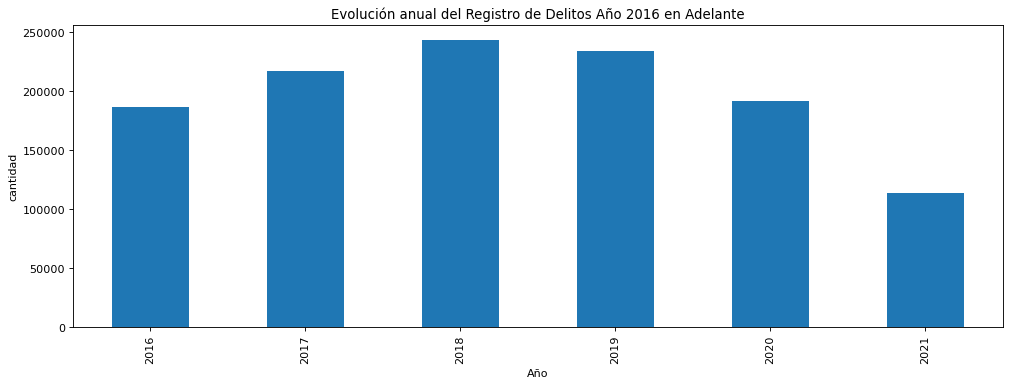

In [200]:
#grafico la cantidad de registros por año a partir del 2016
#me quedo con los registros de los años 2016 en adelante
ao_delitos_selection=data[data["ao_hechos"]>=2016]
#agrupo y cuento la cantidad de registro por año
ao_delitos_selection_df=ao_delitos_selection.groupby("ao_hechos")["ao_hechos"].count()
ao_delitos_selection_df
#grafico
fig, ax = plt.subplots(figsize=(15, 5), dpi=80)
ao_delitos_selection_df.plot(kind="bar")
ax.set_title("Evolución anual del Registro de Delitos Año 2016 en Adelante")
ax.set_ylabel("cantidad")
ax.set_xlabel("Año")
plt.xticks(rotation=90)
plt.show()

#### ANALISIS ESTACIONALIDAD MENSUAL

In [158]:
#me sobre el df con detalle de año y mes me quedo con los años mayores a 2015 y menor a 2021 que esta incompleto
mes_delitos_df_selection=mes_delitos_df[(mes_delitos_df["ao_hechos"]>=2016)&(mes_delitos_df["ao_hechos"]<2021)]
mes_delitos_df_selection.head(3)

,ao_hechos,mes_hechos_int,value
792,2016,1,14496.0
793,2016,2,14888.0
794,2016,3,15354.0


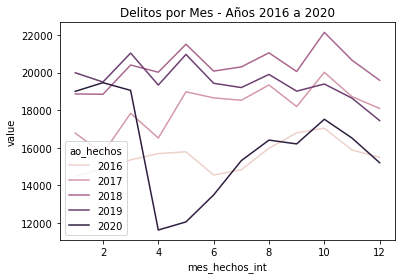

In [161]:
#grafico
ax=sns.lineplot(data=mes_delitos_df_selection, x="mes_hechos_int", y="value", hue="ao_hechos")
ax.set_title("Delitos por Mes - Años 2016 a 2020")
plt.show()

<div class="alert-success"> 
Para los años 2017 a 2019 se notan picos de delito en los meses 3,5,8 y 10
    Para el año 2016, se verifican los picos de los meses 5 y 10
    Para el año 2020, es dificil analizar luego de la caida en el mes 4, corresponde analizar si es una caída del delito o hay un problema en el registro de los datos (caída del sistema, pérdida de datos, etc.). Luego se verifica el pico en el mes 10 como en el resto de los años
    
 </div> 


### ESTACIONALIDAD DIARIA


In [309]:
#agrego al df el dato del dia del mes
data["dia_hechos_int"]=data["fecha_hechos"].dt.day


In [192]:
#para analizar los delitos por dia los agrupo en un group by
dia_delitos_gby=data.groupby(["ao_hechos","mes_hechos_int","dia_hechos_int"])["dia_hechos_int"].count()
#genero un dataframe del groupby
dia_delitos_df=dia_delitos_gby.unstack()
dia_delitos_df.reset_index(inplace=True)
#reemplazo con cero los nulos que surgen de los meses sin datos
dia_delitos_df=dia_delitos_df.fillna(0)
dia_delitos_df=dia_delitos_df.melt(id_vars=["ao_hechos","mes_hechos_int"])

dia_delitos_df.tail(5)

,ao_hechos,mes_hechos_int,dia_hechos_int,value
15526,2021,3,31,587.0
15527,2021,4,31,0.0
15528,2021,5,31,573.0
15529,2021,6,31,0.0
15530,2021,7,31,190.0


In [202]:
#para analizar los delitos por dia los agrupo en un group by
dia_delitos_gby=data.groupby(["ao_hechos","mes_hechos_int","dia_hechos_int"])["dia_hechos_int"].count()
#genero un dataframe del groupby
dia_delitos_df=dia_delitos_gby.unstack()
dia_delitos_df.reset_index(inplace=True)
#reemplazo con cero los nulos que surgen de los meses sin datos
dia_delitos_df=dia_delitos_df.fillna(0)
#unpivot
dia_delitos_df=dia_delitos_df.melt(id_vars=["ao_hechos","mes_hechos_int"])
#ordeno por ano , mes , dia
dia_delitos_df.sort_values(by=["ao_hechos","mes_hechos_int","dia_hechos_int" ], inplace=True)
#me quedo con los registros entre 2016 y 2020 
dia_delitos_df_selection=dia_delitos_df[(dia_delitos_df["ao_hechos"]>2015)&(dia_delitos_df["ao_hechos"]<2021)]
#ctl suma valores por año
dia_delitos_df_selection.groupby("ao_hechos")["value"].sum()

ao_hechos
2016    186784.0
2017    217350.0
2018    243504.0
2019    233840.0
2020    191863.0
Name: value, dtype: float64

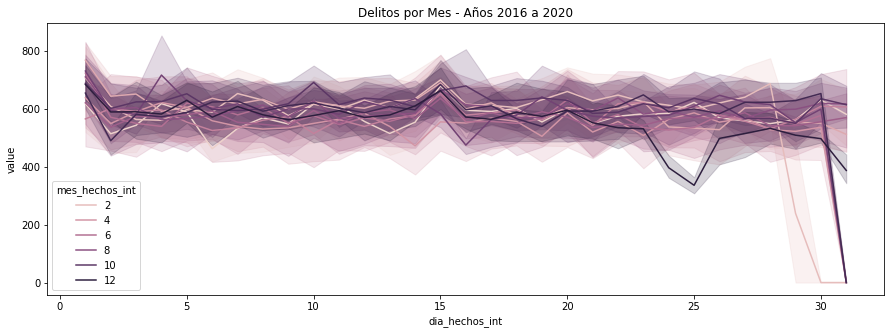

In [208]:
#grafico
plt.figure(figsize=(15, 5))
ax=sns.lineplot(data=dia_delitos_df_selection, x="dia_hechos_int", y="value", hue="mes_hechos_int")
ax.set_title("Delitos por Mes - Años 2016 a 2020")

plt.show()

In [214]:
dia_delitos_df_selection["dia_hechos_int"].unique()[0:28]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=object)

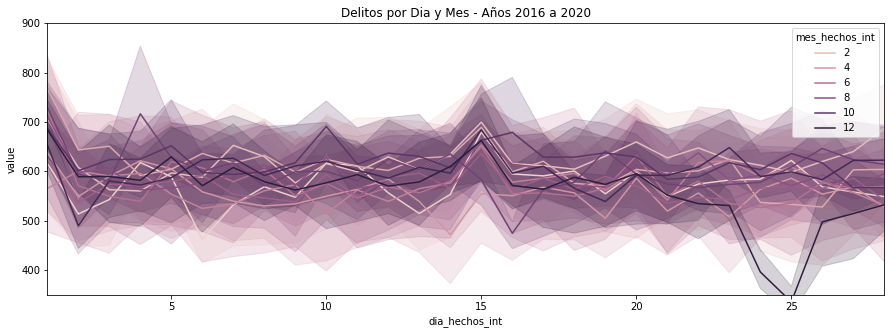

In [219]:
#dejo afuera los dias 29,30 y 31 para poder analizar mejor
#grafico
plt.figure(figsize=(15, 5))
ax=sns.lineplot(data=dia_delitos_df_selection, x="dia_hechos_int", y="value", hue="mes_hechos_int")
ax.set_title("Delitos por Dia y Mes - Años 2016 a 2020")
ax.set_xlim(1,28)
ax.set_ylim(350,900)
plt.show()

<div class="alert-success"> 
Alrededor del día 5 y también mas notoriamente en el  día 15 se nota una claro pico que se repite en la mayoria de los años.
    No hay información disponible para explicar las causas de estos picos, habría que cruzar los delitos que se producen en esos días para para intentar tener una explicación
 </div> 


In [317]:
data[data["dia_hechos_int"]==15]["categoria_delito"].value_counts()

DELITO DE BAJO IMPACTO                                     36066
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        2341
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        2082
HECHO NO DELICTIVO                                          1953
ROBO A NEGOCIO CON VIOLENCIA                                 676
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        410
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        363
VIOLACIÓN                                                    271
HOMICIDIO DOLOSO                                             189
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                164
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      122
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      111
ROBO A CASA HABITACIÓN CON VIOLENCIA                         102
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 47
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      24
SECUESTRO                

<div class="alert-success"> 
Intiutivamente (sin ningún análisis que lo respalde) podría decir que quizá los días 5 y 15 corresponden a días de pago, y por ello se dan mas situación de DELITOS DE BAJO IMPACTO Y ROBO
 </div> 


<a id="section9"></a> 
### 9-Indicador Nivel de Seguridad
[volver a TOC](#section_toc)

Este punto se plante a nivel teórico.

INDICADOR DE NIVEL DE INSEGURIDAD:

    Establer un nivel geográfico: manzana,barrio, colonia, alcaldía (puede ser de un nivel o multinivel)
    
    Clasificar los delitos según su impacto: bajo impacto y alto impacto de acuerdo a si hubo o no violencia o riesgo de vida
    
    Identificar cuales son las zonas geográficas con mayor cantidad de delitos de alto impacto (se puede hacer un heatmap sobre los datos geolocalizados)
    


ACCIONES A TOMAR:
     
     identificando las zonas de mayor nivel de inseguridad se pueden coordinar los recursos de cada alcaldía (ej asignar mas tiempo de patrullaje o efectivos policiales a esas zonas, y en los horarios y días donde se registren picos de estacionaliad)
    se puede coordinar el intercambio de recursos entre alcaldías para cubrir picos de delito

<a id="section10"></a> 
### 10-Anexo - Prueba de calidad de los datos

[volver a TOC](#section_toc)

En este punto planteo las pruebas a realizar para asegurar la calidad de los datos. Se plantean solo a nivel teórico
El ojetivo es asegurar que los datos sean consitentes y contengan la menor cantidad de errores posibles

#### Control Georeferencial

Geocodificar los datos de latitud y longitud y verificar, que se encuentren dentro de los polígonos correspondientes a cada colonia y alcaldía

#### Categorias Delitos

Verificar las relacion univoca entre categroría y delito
Agregar una clasificación mas general del tipo (robo, hurto, violacion, homicidio, narcotrafico) con no mas de 5 o 6 valores unicos que sea representativo de los principales tipos de delito

Reducir la cantidad de valores unicos de delito según patrones comunes para poder realizar análisis, con la cantidad de valores que adopta hoy se dificulta  obtener una conclusion. En la base hay un total de 342 tipos de delitos, el 84% está representado en 34 tipos distintos de delitos. Hay muchos delitos que registran muy pocos eventos, pueden ser agrupados con otros similares

Agregar una columna indicando si el delito incluye o no violencia.

Verificar la categoría "FEMICIDIO", tiene un sólo registro. O faltan los registros o están categorizados en otra categoría

#### Control valores extremos

Verificar valore extremos según distintos agrupamientos, ej en agrupamiento por año con detalle mensual para el año 2020 hay una caida muy notoria de datos para el mes 04. Podría tratarse de una baja real de delitos o de algún problema en el registro del dato o extracción de datos para esa fecha